In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [21]:
od_net = pd.read_csv('../data/pop_travel/OD_Matrix_v3_cleaned.csv',usecols=[0,2,4])
hzs = od_net.Origin.unique()

In [22]:
od_crow = pd.read_csv('../data/pop_travel/OD_Crow_Flight.csv')
od_crow = od_crow[(od_crow.Origin.isin(hzs))&(od_crow.Destination.isin(hzs))]
od_crow['Travel_Time'] = od_crow.Distance/15.

In [23]:
## Distance in kms. Travel_Time in minutes. Assuming 15 m/s for converting od_crow distance to travel time. 

In [24]:
od_crow_pivot = od_crow.pivot(index='Origin',columns='Destination',values='Travel_Time')
od_net_pivot = od_net.pivot(index='Origin',columns='Destination',values='Travel_Time')

In [38]:
gdf = gpd.read_file('../data/shapefile/healthzones_v2/DRC_Districts.shp')
gdf = gdf[gdf.ADM1_NAME.isin(['NORD KIVU','ITURI'])]
sorted_hzs = gdf.sort_values(['CENTER_LAT','CENTER_LON'],ascending=False).ADM2_NAME.values

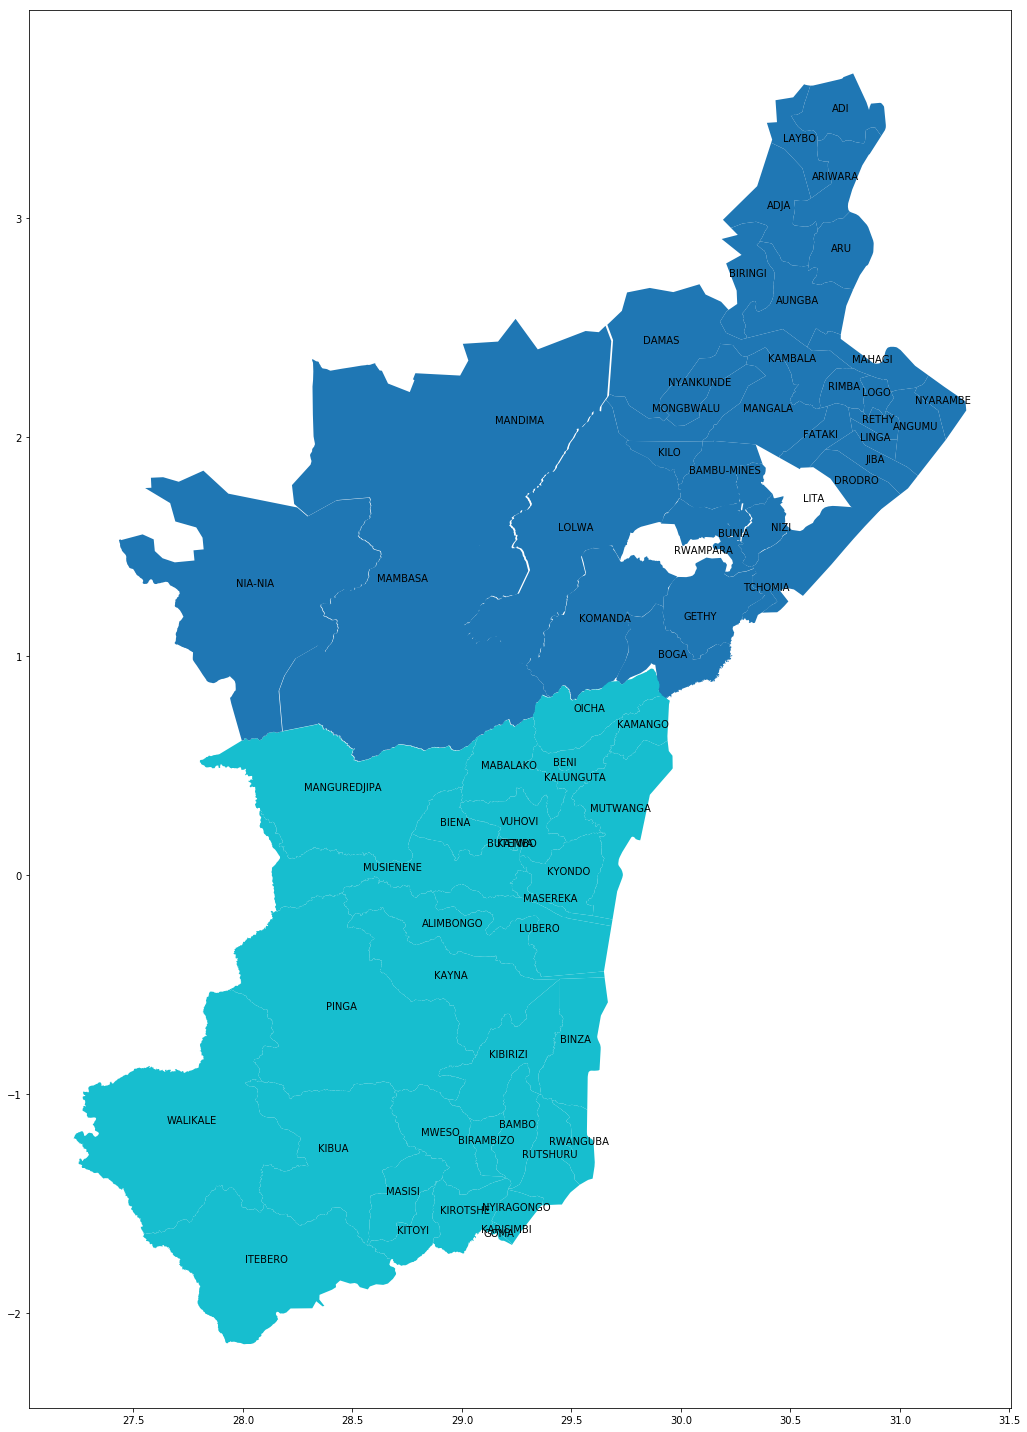

In [41]:
gdf.plot(column='ADM1_NAME',figsize=(15,20))
for idx, row in gdf.iterrows():
    plt.annotate(s=row['ADM2_NAME'], xy=[row['CENTER_LON'],row['CENTER_LAT']],
                 horizontalalignment='center')
plt.tight_layout()
plt.savefig('../plots/ituri_nordkivu_hzs.pdf',dpi=100)

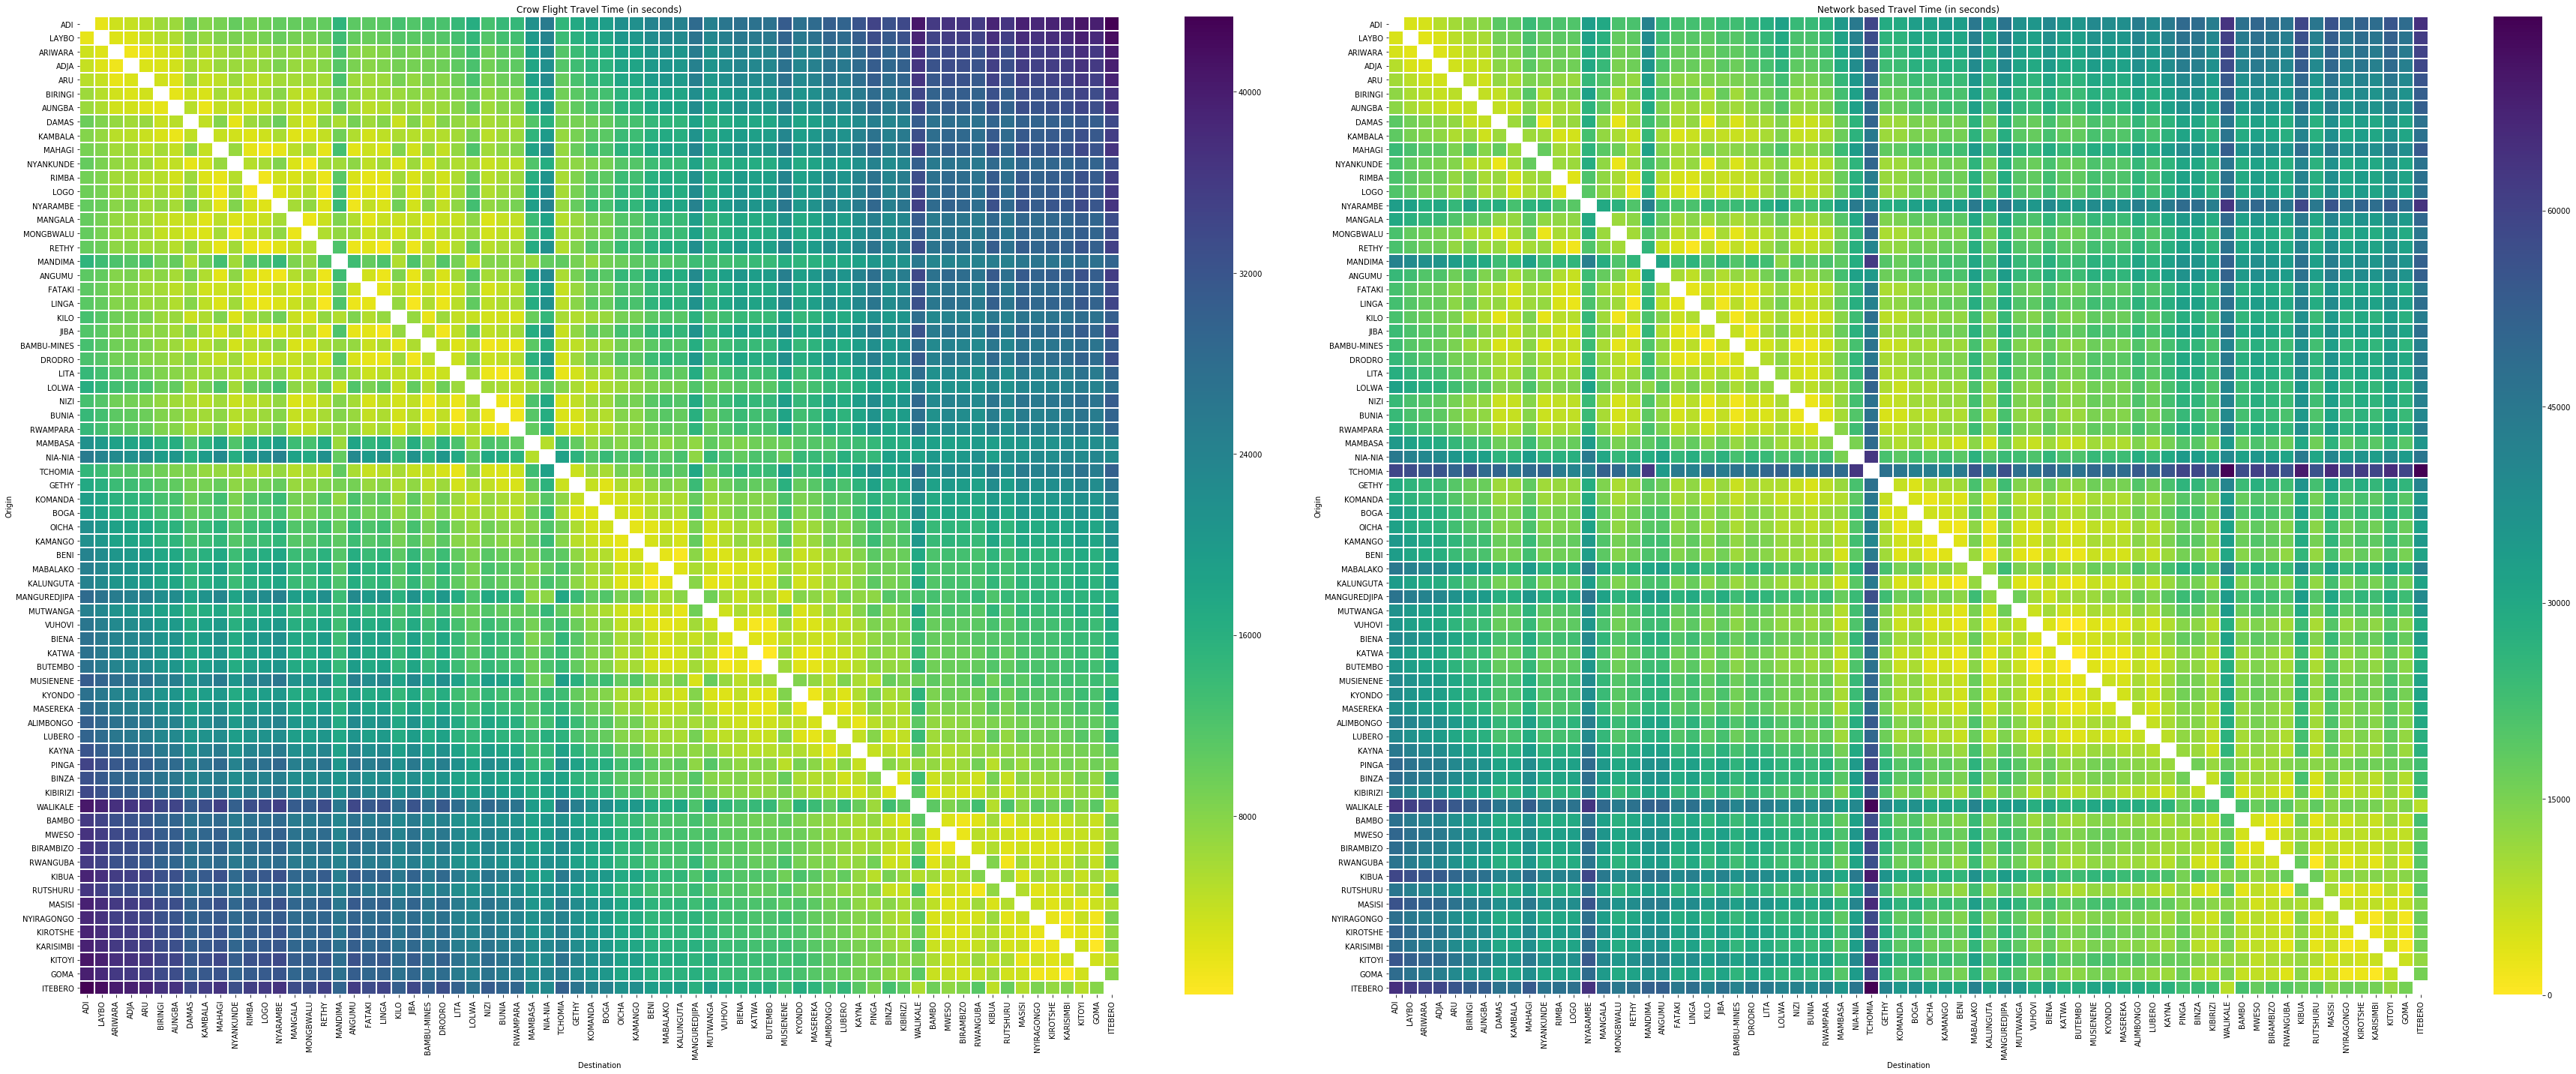

In [42]:
f,axarr = plt.subplots(1,2,figsize=(50,20))

sns.heatmap(od_crow_pivot.loc[sorted_hzs][sorted_hzs], cmap=cm.viridis_r,ax=axarr[0],lw=1)
sns.heatmap(od_net_pivot.loc[sorted_hzs][sorted_hzs], cmap=cm.viridis_r,ax=axarr[1],lw=1)
axarr[0].set_title('Crow Flight Travel Time (in seconds)')
axarr[1].set_title('Network based Travel Time (in seconds)')
plt.tight_layout()
plt.savefig('../plots/compare_crow_net.pdf',dpi=100)

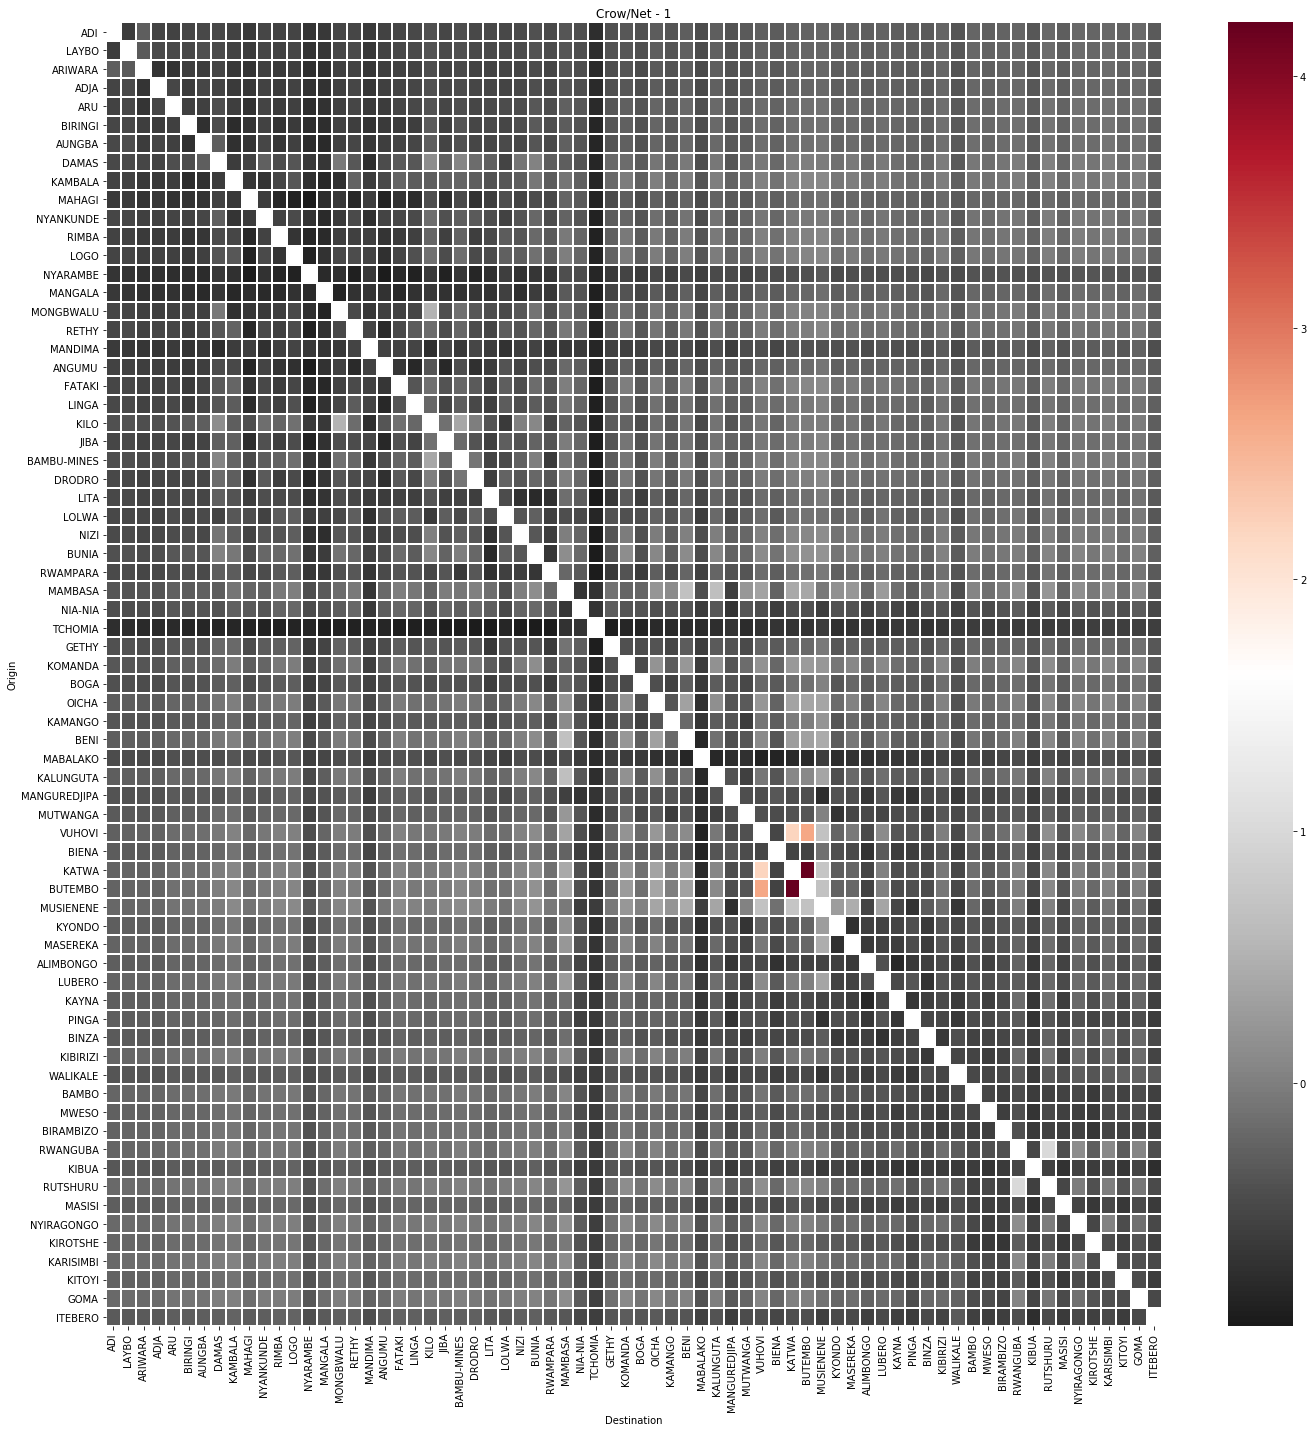

In [56]:
od_crownet_ratio = od_crow_pivot/od_net_pivot - 1
plt.figure(figsize=(20,20))
sns.heatmap(od_crownet_ratio.loc[sorted_hzs][sorted_hzs], cmap=cm.RdGy_r,lw=1)
plt.title('Crow/Net - 1')
plt.tight_layout()
plt.savefig('../plots/crownet_ratio.pdf',dpi=100)